In [1]:
install.packages('randomForestSRC')

Installing package into ‘/home/sf673542/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Warning message in install.packages("randomForestSRC"):
“installation of package ‘randomForestSRC’ had non-zero exit status”

In [2]:
library(randomForestSRC)


 randomForestSRC 2.7.0 
 
 Type rfsrc.news() to see new features, changes, and bug fixes. 
 



In [26]:
library(tictoc)
library('caret')
library(pROC)
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [5]:
data = read.csv('../../AnnotateData/recgli_annot10_CELorNELorUNK.csv')

In [6]:
data = data[,c('vialid','t_number_y', 'CELorNEL', 'newdata', 
               'cbvn_nlin', 'recov_npar','ccri', 'cni', 'ncho', 'ncre', 'nnaa', 'nadc.1', 'nfa.1', 'outcome')]


In [7]:
data = data[which(data$outcome == "txe" | data$outcome == "rHGG"),]

In [10]:
dim(data)

[1] 305  14

In [11]:
colSums(is.na(data))

vialid t_number_y   CELorNEL    newdata  cbvn_nlin recov_npar       ccri 
         0          0          0          0        101        101        145 
       cni       ncho       ncre       nnaa     nadc.1      nfa.1    outcome 
       145        145        145        145         16         16          0

In [12]:
data_imp = impute(data = data)

In [13]:
colSums(is.na(data_imp))

vialid t_number_y   CELorNEL    newdata  cbvn_nlin recov_npar       ccri 
         0          0          0          0          0          0          0 
       cni       ncho       ncre       nnaa     nadc.1      nfa.1    outcome 
         0          0          0          0          0          0          0

In [30]:
data_imp = droplevels.data.frame(data_imp)

In [67]:
## split into train/test by tnum 
unique_tnums = unique(data$t_number_y)
set.seed(10)
train_tnums = unique_tnums[sample(c(1:length(unique_tnums)), size = round(length(unique_tnums)*.75))]
test_tnums = unique_tnums[! unique_tnums %in% train_tnums]

In [68]:
## split data by patient split above: 
data_train = data_imp[data_imp$t_number_y %in% train_tnums, ]
data_test = data_imp[data_imp$t_number_y %in% test_tnums, ]

In [69]:
table(data_imp$outcome)['txe']/sum(table(data_imp$outcome)['txe'],table(data_imp$outcome)['rHGG'])

txe 
0.2688525

In [70]:
dim(data_train)
table(data_train$outcome)
table(data_train$outcome)['txe']/sum(table(data_train$outcome)['txe'],table(data_train$outcome)['rHGG'])

[1] 227  14


rHGG  txe 
 166   61 

txe 
0.2687225

In [71]:
dim(data_test)
table(data_test$outcome)
table(data_test$outcome)['txe']/sum(table(data_test$outcome)['txe'],table(data_test$outcome)['rHGG'])

[1] 78 14


rHGG  txe 
  57   21 

txe 
0.2692308

In [91]:
write.csv(data_imp, 'data_imputed.csv')

## without imputation indicators: 

In [72]:
outcome = "outcome"
features = c('CELorNEL', 'newdata', 'cbvn_nlin', 'recov_npar',
             'ccri', 'cni', 'ncho', 'ncre', 'nnaa', 'nadc.1', 'nfa.1')
features.addsign <- paste(features, collapse = "+")
rf_formula = as.formula(paste(outcome, features.addsign, sep = "~"))

In [83]:
rf = randomForest(formula = rf_formula, 
                   data = data_train, cw =c(10000, .1))

In [84]:
train_preds = predict(rf, data_train)

In [85]:
train_conf_mat = confusionMatrix(train_preds, data_train$outcome)
train_conf_mat

Confusion Matrix and Statistics

          Reference
Prediction rHGG txe
      rHGG  166   0
      txe     0  61
                                     
               Accuracy : 1          
                 95% CI : (0.9839, 1)
    No Information Rate : 0.7313     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.7313     
         Detection Rate : 0.7313     
   Detection Prevalence : 0.7313     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : rHGG       
                                     

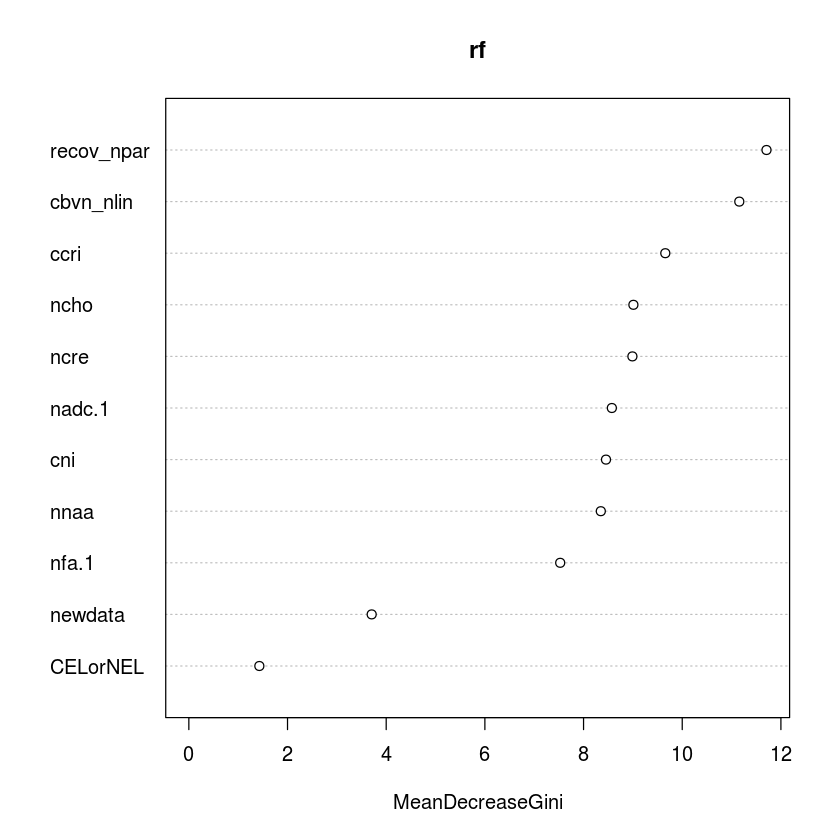

In [88]:
varImpPlot(rf,type=2)

In [86]:
test_preds = predict(rf, data_test)

test_conf_mat = confusionMatrix(test_preds, data_test$outcome)


In [87]:
test_conf_mat

Confusion Matrix and Statistics

          Reference
Prediction rHGG txe
      rHGG   51  19
      txe     6   2
                                          
               Accuracy : 0.6795          
                 95% CI : (0.5642, 0.7807)
    No Information Rate : 0.7308          
    P-Value [Acc > NIR] : 0.8736          
                                          
                  Kappa : -0.0125         
 Mcnemar's Test P-Value : 0.0164          
                                          
            Sensitivity : 0.89474         
            Specificity : 0.09524         
         Pos Pred Value : 0.72857         
         Neg Pred Value : 0.25000         
             Prevalence : 0.73077         
         Detection Rate : 0.65385         
   Detection Prevalence : 0.89744         
      Balanced Accuracy : 0.49499         
                                          
       'Positive' Class : rHGG            
                                          